In [1]:
#import modules
import pandas as pd  # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline

In [2]:
df = pd.read_excel('Employees.xlsx')
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


#### Please Note that in Status 0 means Existing Employee while 1 means Former Employee

In [3]:
df = df.drop('Emp ID', axis=1)

In [4]:
status = df.groupby('status')
status.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
status,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [5]:
df.status.value_counts()

0    11428
1     3571
Name: status, dtype: int64

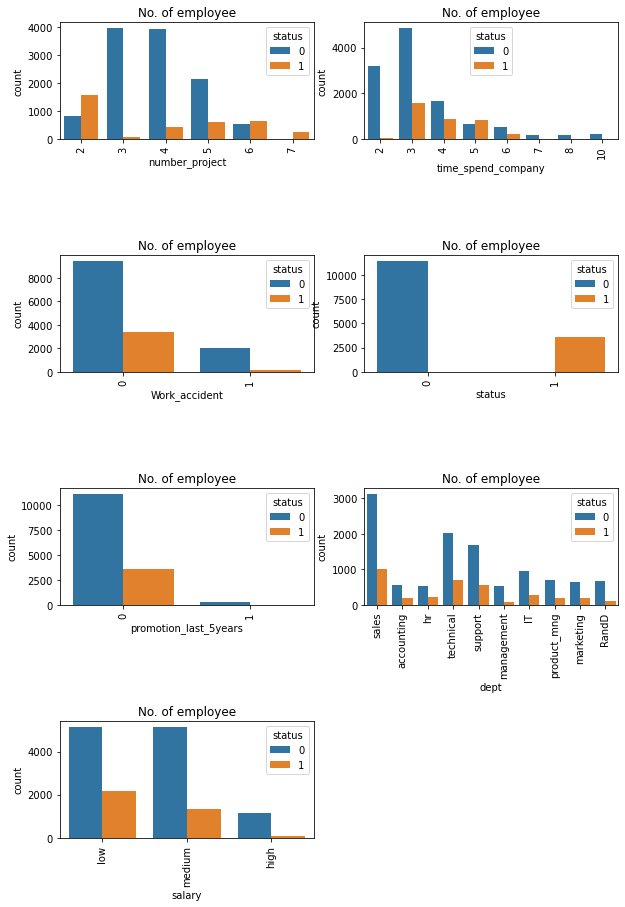

In [8]:
features=['number_project','time_spend_company','Work_accident','status', 'promotion_last_5years','dept','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='status')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

### You can observe the following points in the above visualization:

-Those employees who have the number of projects more than 5 were left the company.

-The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.

-The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

-Those who were promoted in last 5 years didn't leave, while all those that left didn't get a promotion in the previous 5 years.

### Data Analysis and Visualization Summary:

### The following features are most influencing a person to leave the company:

#### - Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.

#### - Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

#### - Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.

#### - Salary: Most of the employees that quit among the mid or low salary groups.

## CLUSTER ANALYSIS

In [9]:
#import module
from sklearn.cluster import KMeans
# Filter data
status_emp =  df[['satisfaction_level', 'last_evaluation']][df.status == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(status_emp)

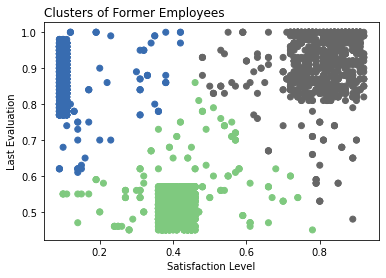

In [10]:
# Add new column "label" annd assign cluster labels.
status_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(status_emp['satisfaction_level'], status_emp['last_evaluation'], c=status_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of Former Employees', loc='left')
plt.savefig('Employee Cluster.png')
plt.show()

### Employee who left the company can be grouped into 3 type of employees:

#### - High Satisfaction and High Evaluation (Shaded by grey color in the graph), you can also call them Winners.

#### - Low Satisfaction and High Evaluation(Shaded by blue color in the graph), you can also call them Frustrated.

#### - Moderate Satisfaction and moderate Evaluation (Shaded by green color in the graph) , you can also call them 'Bad match'.

## BUILDING A PREDICTION MODEL

In [11]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['dept']=le.fit_transform(df['dept'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1


In [12]:
df2 = pd.read_excel('Existing employees.xlsx')
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,existing
1,2002,0.82,0.67,2,202,3,0,0,sales,low,existing
2,2003,0.45,0.69,5,193,3,0,0,sales,low,existing
3,2004,0.78,0.82,5,247,3,0,0,sales,low,existing
4,2005,0.49,0.60,3,214,2,0,0,sales,low,existing


In [13]:
df3 = df2.copy()

In [14]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le2 = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df2['salary']=le2.fit_transform(df2['salary'])
df2['dept']=le2.fit_transform(df2['dept'])
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,7,1,existing
1,2002,0.82,0.67,2,202,3,0,0,7,1,existing
2,2003,0.45,0.69,5,193,3,0,0,7,1,existing
3,2004,0.78,0.82,5,247,3,0,0,7,1,existing
4,2005,0.49,0.60,3,214,2,0,0,7,1,existing


In [15]:
df2 = df2.drop('status', axis=1)

In [16]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]
y=df['status']

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [18]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9735555555555555
Precision: 0.9669260700389105
Recall: 0.9212233549582948


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[3387   34]
 [  85  994]]


In [21]:
df2 = df2.drop('Emp ID', axis=1)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,7,1
1,0.82,0.67,2,202,3,0,0,7,1
2,0.45,0.69,5,193,3,0,0,7,1
3,0.78,0.82,5,247,3,0,0,7,1
4,0.49,0.60,3,214,2,0,0,7,1


In [22]:
predict = gb.predict(df2)
prediction = pd.DataFrame(predict, columns=['Prediction'])
prediction.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [23]:
prediction['Prediction'].value_counts()

0    11325
1      103
Name: Prediction, dtype: int64

In [24]:
merge_col = pd.merge(df3, prediction, on=df3.index)
merge_col

,key_0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status,Prediction
0,0,2001,0.58,0.74,4,215,3,0,0,sales,low,existing,0
1,1,2002,0.82,0.67,2,202,3,0,0,sales,low,existing,0
2,2,2003,0.45,0.69,5,193,3,0,0,sales,low,existing,0
3,3,2004,0.78,0.82,5,247,3,0,0,sales,low,existing,0
4,4,2005,0.49,0.60,3,214,2,0,0,sales,low,existing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,11423,14207,0.90,0.55,3,259,10,1,1,management,high,existing,0
11424,11424,14208,0.74,0.95,5,266,10,0,1,management,high,existing,0
11425,11425,14209,0.85,0.54,3,185,10,0,1,management,high,existing,0
11426,11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,existing,0


In [26]:
output = merge_col[merge_col['Prediction']==1]
output.drop(columns=['key_0'], inplace=True)
output = output.reset_index()
output

,index,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status,Prediction
0,12,2013,0.48,0.94,5,255,6,0,0,accounting,medium,existing,1
1,160,2161,0.46,0.69,2,159,2,0,0,sales,low,existing,1
2,415,2416,0.92,0.97,4,238,5,1,0,support,medium,existing,1
3,498,2499,0.45,0.52,2,105,3,0,0,technical,low,existing,1
4,570,2571,0.80,0.96,3,257,5,0,0,support,medium,existing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,10599,13383,0.65,0.91,4,243,5,1,0,IT,medium,existing,1
99,10815,13599,0.43,0.46,2,186,2,0,0,product_mng,low,existing,1
100,10846,13630,0.75,0.99,2,237,5,1,0,product_mng,low,existing,1
101,11266,14050,0.43,0.88,2,149,4,0,0,product_mng,medium,existing,1


In [27]:
output.drop(columns=['index'], inplace=True)
output.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status,Prediction
0,2013,0.48,0.94,5,255,6,0,0,accounting,medium,existing,1
1,2161,0.46,0.69,2,159,2,0,0,sales,low,existing,1
2,2416,0.92,0.97,4,238,5,1,0,support,medium,existing,1
3,2499,0.45,0.52,2,105,3,0,0,technical,low,existing,1
4,2571,0.80,0.96,3,257,5,0,0,support,medium,existing,1


In [29]:
output.to_excel("Prediction.xlsx")